# Inner Blocker Size determination

## @Milo
## January, 2018

In [1]:
from foxsisim.util import load_rays
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

## Blocker diameter = 2.623cm

In [2]:
B2623rays = load_rays('/Users/Kamilobu/Desktop/Developer/Milo_RayTracing/1millionRays/1AU/inner_blocker_10Shell/B2623/rays_on_module_3M.csv')
print('Number of rays0 : {:d}'.format(len(B2623rays)))

Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/1millionRays/1AU/inner_blocker_10Shell/B2623/rays_on_module_3M.csv loaded.
Number of rays0 : 2773126


In [3]:
# Create detector:
from foxsisim.detector import Detector
B2623detector = Detector(width=10,
                    height=10,
                    normal = [0,0,1],
                    center = [0,0,230],
                    reso = [1024,1024])

# Fix little bug in rays:
for ray in B2623rays:
    ray.hist = ray.hist.tolist()

# Detector Catch rays:
B2623detector.catchRays(B2623rays)

In [5]:
B2623Drays = [ray for ray in B2623rays if (ray.des[2]==230.0 and ray.bounces ==2 )]
B2623Srays = [ray for ray in B2623rays if (ray.des[2]==230.0 and ray.bounces ==1 )]
B2623Hrays = [ray for ray in B2623rays if (ray.des[2]==230.0 and ray.bounces ==1 and ray.tag[-4:] == 'Hy-D' )]
B2623Prays = [ray for ray in B2623rays if (ray.des[2]==230.0 and ray.bounces ==1 and ray.tag[-4:] == 'Pa-D' )]

#sim_scale = 1.0    # 1cm = 17.4 arcmin
sim_scale = 17.4    # 1cm = 17.4 arcmin

#Hyperboloid
B2623Hx, B2623Hy = [], []
for ray in B2623Hrays:
    B2623Hx.append(ray.pos[0]*sim_scale)
    B2623Hy.append(ray.pos[1]*sim_scale)

# Paraboloid
B2623Px, B2623Py = [], []
for ray in B2623Prays:
    B2623Px.append(ray.pos[0]*sim_scale)
    B2623Py.append(ray.pos[1]*sim_scale)

# Double
B2623Dx, B2623Dy = [], []
for ray in B2623Drays:
    B2623Dx.append(ray.pos[0]*sim_scale)
    B2623Dy.append(ray.pos[1]*sim_scale)

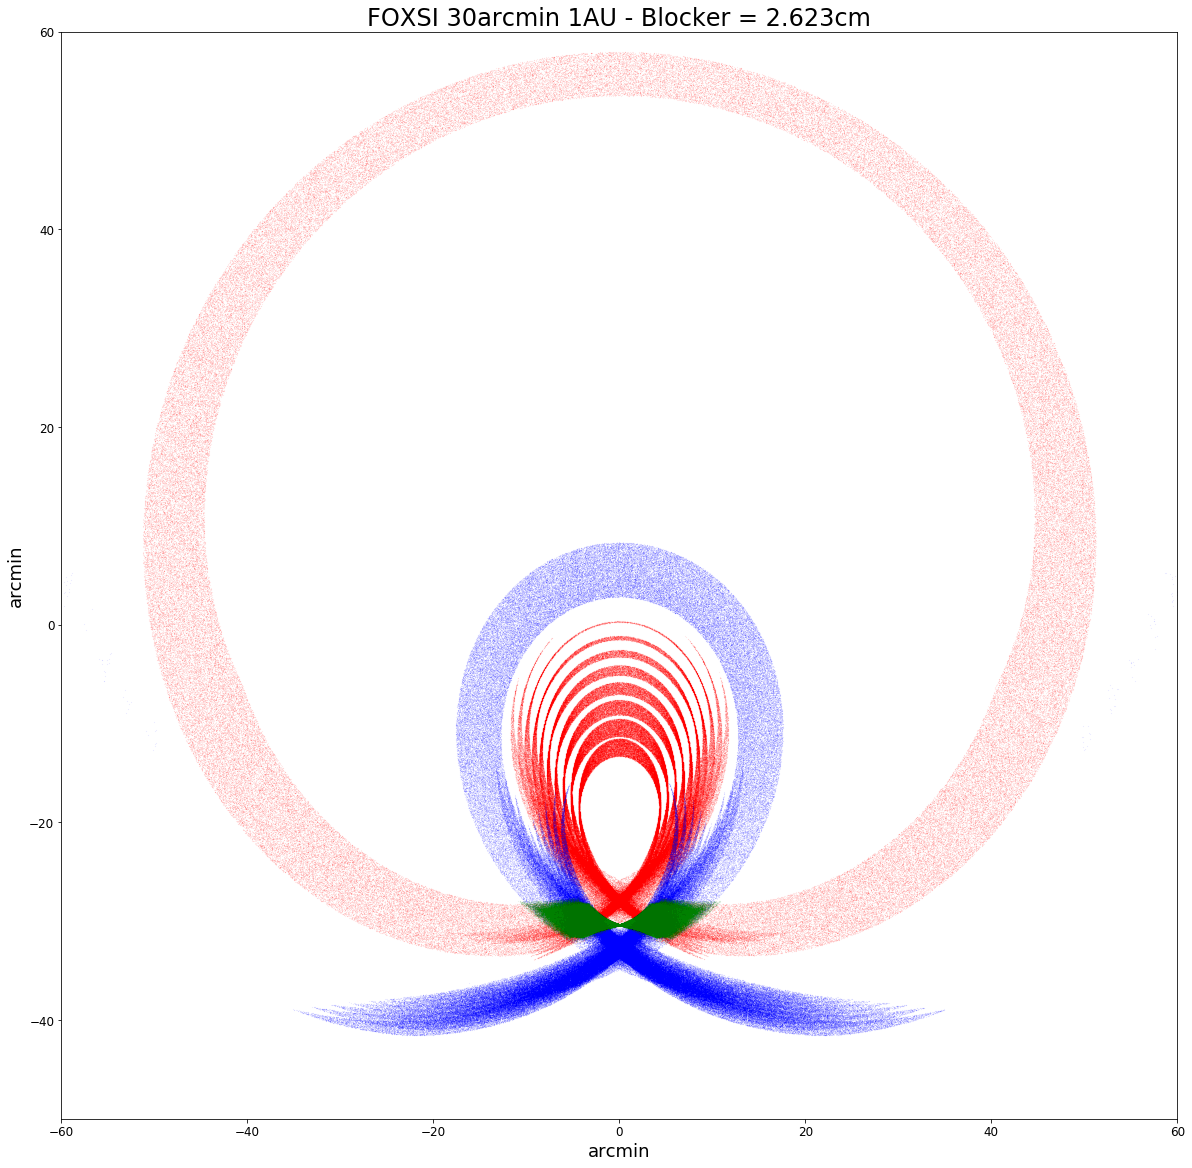

In [7]:
fig = plt.figure(figsize=(20,20))
plt.title('FOXSI 30arcmin 1AU - Blocker = 2.623cm',fontsize=24)
plt.xlabel('arcmin',fontsize=18)
plt.ylabel('arcmin',fontsize=18)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.scatter(B2623Hx,B2623Hy,color='red',s=0.001,alpha=0.8)
plt.scatter(B2623Px,B2623Py,color='blue',s=0.001,alpha=0.8)
plt.scatter(B2623Dx,B2623Dy,color='green',s=0.001,alpha=0.8)
plt.ylim(-50.,60.)
plt.xlim(-60.,60.)
plt.show()

## Blocker diameter = 2.805cm

In [8]:
B2805rays = load_rays('/Users/Kamilobu/Desktop/Developer/Milo_RayTracing/1millionRays/1AU/inner_blocker_10Shell/B2805/rays_on_module_3M.csv')
print('Number of rays0 : {:d}'.format(len(B2805rays)))

Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/1millionRays/1AU/inner_blocker_10Shell/B2805/rays_on_module_3M.csv loaded.
Number of rays0 : 2838381


In [9]:
# Create detector:
from foxsisim.detector import Detector
B2805detector = Detector(width=10,
                    height=10,
                    normal = [0,0,1],
                    center = [0,0,230],
                    reso = [1024,1024])

# Fix little bug in rays:
for ray in B2805rays:
    ray.hist = ray.hist.tolist()

# Detector Catch rays:
B2805detector.catchRays(B2805rays)

In [10]:
B2805Drays = [ray for ray in B2805rays if (ray.des[2]==230.0 and ray.bounces ==2 )]
B2805Srays = [ray for ray in B2805rays if (ray.des[2]==230.0 and ray.bounces ==1 )]
B2805Hrays = [ray for ray in B2805rays if (ray.des[2]==230.0 and ray.bounces ==1 and ray.tag[-4:] == 'Hy-D' )]
B2805Prays = [ray for ray in B2805rays if (ray.des[2]==230.0 and ray.bounces ==1 and ray.tag[-4:] == 'Pa-D' )]

#sim_scale = 1.0    # 1cm = 17.4 arcmin
sim_scale = 17.4    # 1cm = 17.4 arcmin

#Hyperboloid
B2805Hx, B2805Hy = [], []
for ray in B2805Hrays:
    B2805Hx.append(ray.pos[0]*sim_scale)
    B2805Hy.append(ray.pos[1]*sim_scale)

# Paraboloid
B2805Px, B2805Py = [], []
for ray in B2805Prays:
    B2805Px.append(ray.pos[0]*sim_scale)
    B2805Py.append(ray.pos[1]*sim_scale)

# Double
B2805Dx, B2805Dy = [], []
for ray in B2805Drays:
    B2805Dx.append(ray.pos[0]*sim_scale)
    B2805Dy.append(ray.pos[1]*sim_scale)

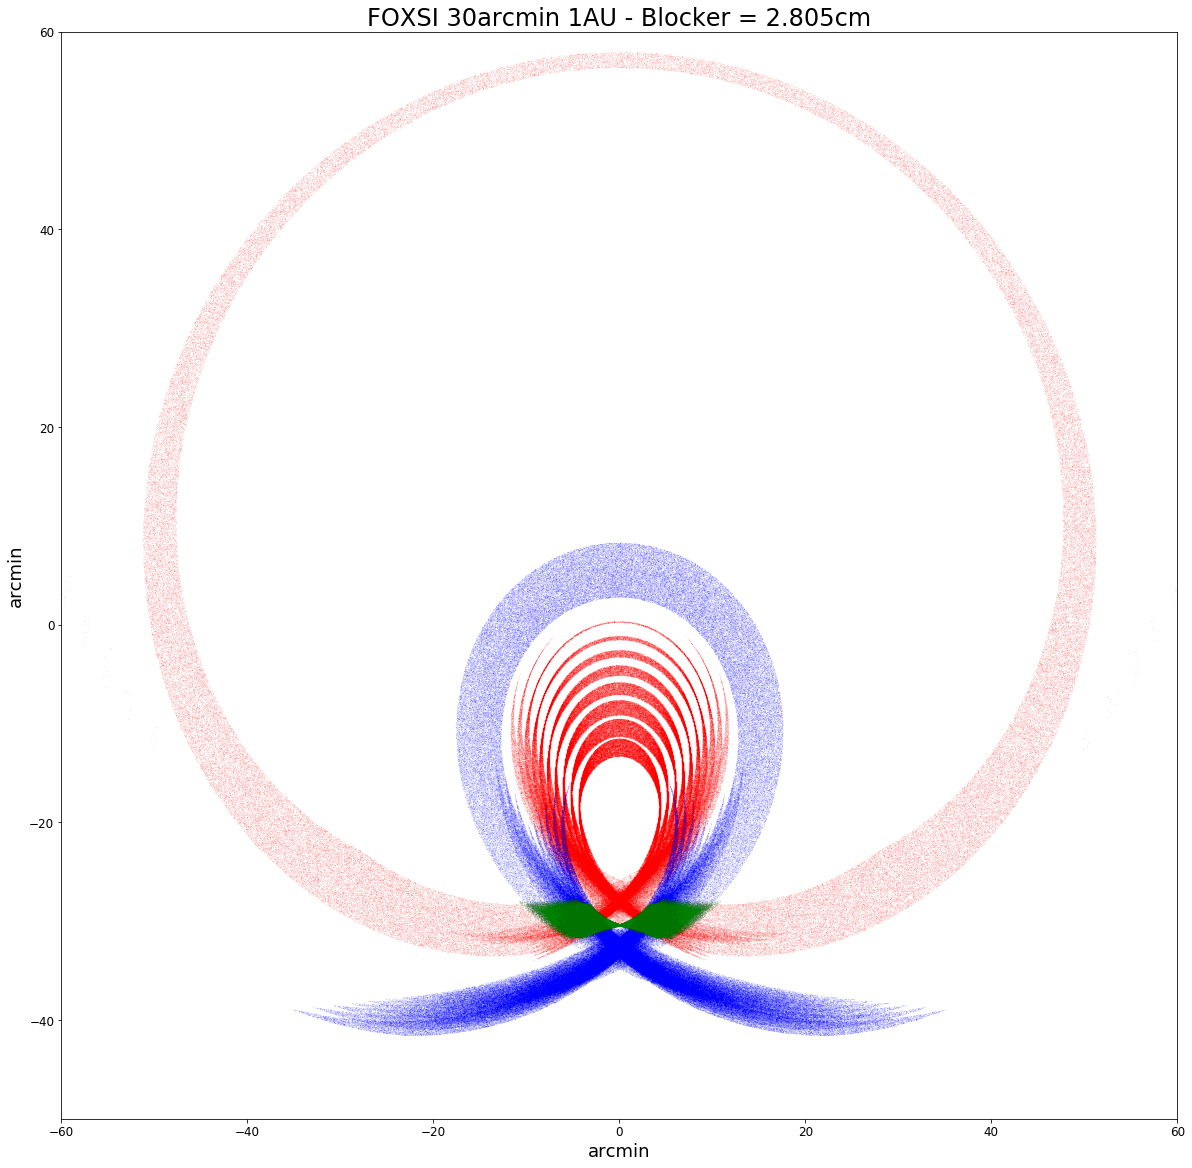

In [11]:
fig = plt.figure(figsize=(20,20))
plt.title('FOXSI 30arcmin 1AU - Blocker = 2.805cm',fontsize=24)
plt.xlabel('arcmin',fontsize=18)
plt.ylabel('arcmin',fontsize=18)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.scatter(B2805Hx,B2805Hy,color='red',s=0.001,alpha=0.8)
plt.scatter(B2805Px,B2805Py,color='blue',s=0.001,alpha=0.8)
plt.scatter(B2805Dx,B2805Dy,color='green',s=0.001,alpha=0.8)
plt.ylim(-50.,60.)
plt.xlim(-60.,60.)
plt.show()

## Blocker diameter = 2.988cm

In [12]:
B2988rays = load_rays('/Users/Kamilobu/Desktop/Developer/Milo_RayTracing/1millionRays/1AU/inner_blocker_10Shell/B2988/rays_on_module_3M.csv')
print('Number of rays0 : {:d}'.format(len(B2988rays)))

Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/1millionRays/1AU/inner_blocker_10Shell/B2988/rays_on_module_3M.csv loaded.
Number of rays0 : 2896459


In [13]:
# Create detector:
from foxsisim.detector import Detector
B2988detector = Detector(width=10,
                    height=10,
                    normal = [0,0,1],
                    center = [0,0,230],
                    reso = [1024,1024])

# Fix little bug in rays:
for ray in B2988rays:
    ray.hist = ray.hist.tolist()

# Detector Catch rays:
B2988detector.catchRays(B2988rays)

In [15]:
B2988Drays = [ray for ray in B2988rays if (ray.des[2]==230.0 and ray.bounces ==2 )]
B2988Srays = [ray for ray in B2988rays if (ray.des[2]==230.0 and ray.bounces ==1 )]
B2988Hrays = [ray for ray in B2988rays if (ray.des[2]==230.0 and ray.bounces ==1 and ray.tag[-4:] == 'Hy-D' )]
B2988Prays = [ray for ray in B2988rays if (ray.des[2]==230.0 and ray.bounces ==1 and ray.tag[-4:] == 'Pa-D' )]

#sim_scale = 1.0    # 1cm = 17.4 arcmin
sim_scale = 17.4    # 1cm = 17.4 arcmin

#Hyperboloid
B2988Hx, B2988Hy = [], []
for ray in B2988Hrays:
    B2988Hx.append(ray.pos[0]*sim_scale)
    B2988Hy.append(ray.pos[1]*sim_scale)

# Paraboloid
B2988Px, B2988Py = [], []
for ray in B2988Prays:
    B2988Px.append(ray.pos[0]*sim_scale)
    B2988Py.append(ray.pos[1]*sim_scale)

# Double
B2988Dx, B2988Dy = [], []
for ray in B2988Drays:
    B2988Dx.append(ray.pos[0]*sim_scale)
    B2988Dy.append(ray.pos[1]*sim_scale)

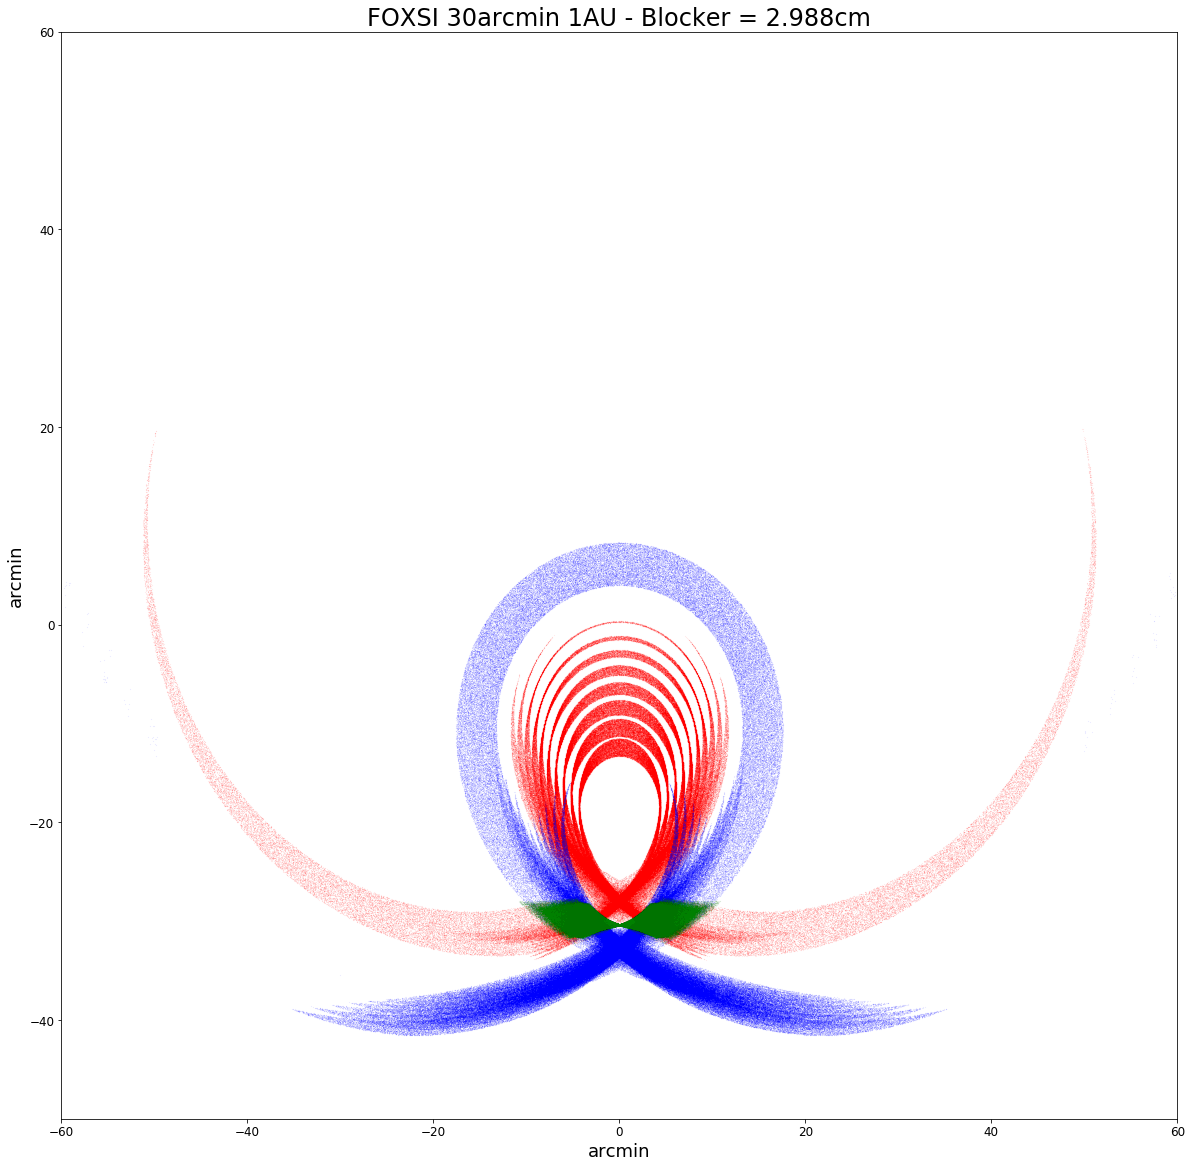

In [16]:
fig = plt.figure(figsize=(20,20))
plt.title('FOXSI 30arcmin 1AU - Blocker = 2.988cm',fontsize=24)
plt.xlabel('arcmin',fontsize=18)
plt.ylabel('arcmin',fontsize=18)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.scatter(B2988Hx,B2988Hy,color='red',s=0.001,alpha=0.8)
plt.scatter(B2988Px,B2988Py,color='blue',s=0.001,alpha=0.8)
plt.scatter(B2988Dx,B2988Dy,color='green',s=0.001,alpha=0.8)
plt.ylim(-50.,60.)
plt.xlim(-60.,60.)
plt.show()

## Blocker diameter = 3.170cm

In [17]:
B3170rays = load_rays('/Users/Kamilobu/Desktop/Developer/Milo_RayTracing/1millionRays/1AU/inner_blocker_10Shell/B3170/rays_on_module_3M.csv')
print('Number of rays0 : {:d}'.format(len(B3170rays)))

Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/1millionRays/1AU/inner_blocker_10Shell/B3170/rays_on_module_3M.csv loaded.
Number of rays0 : 2945311


In [18]:
# Create detector:
from foxsisim.detector import Detector
B3170detector = Detector(width=10,
                    height=10,
                    normal = [0,0,1],
                    center = [0,0,230],
                    reso = [1024,1024])

# Fix little bug in rays:
for ray in B3170rays:
    ray.hist = ray.hist.tolist()

# Detector Catch rays:
B3170detector.catchRays(B3170rays)

In [19]:
B3170Drays = [ray for ray in B3170rays if (ray.des[2]==230.0 and ray.bounces ==2 )]
B3170Srays = [ray for ray in B3170rays if (ray.des[2]==230.0 and ray.bounces ==1 )]
B3170Hrays = [ray for ray in B3170rays if (ray.des[2]==230.0 and ray.bounces ==1 and ray.tag[-4:] == 'Hy-D' )]
B3170Prays = [ray for ray in B3170rays if (ray.des[2]==230.0 and ray.bounces ==1 and ray.tag[-4:] == 'Pa-D' )]

#sim_scale = 1.0    # 1cm = 17.4 arcmin
sim_scale = 17.4    # 1cm = 17.4 arcmin

#Hyperboloid
B3170Hx, B3170Hy = [], []
for ray in B3170Hrays:
    B3170Hx.append(ray.pos[0]*sim_scale)
    B3170Hy.append(ray.pos[1]*sim_scale)

# Paraboloid
B3170Px, B3170Py = [], []
for ray in B3170Prays:
    B3170Px.append(ray.pos[0]*sim_scale)
    B3170Py.append(ray.pos[1]*sim_scale)

# Double
B3170Dx, B3170Dy = [], []
for ray in B3170Drays:
    B3170Dx.append(ray.pos[0]*sim_scale)
    B3170Dy.append(ray.pos[1]*sim_scale)

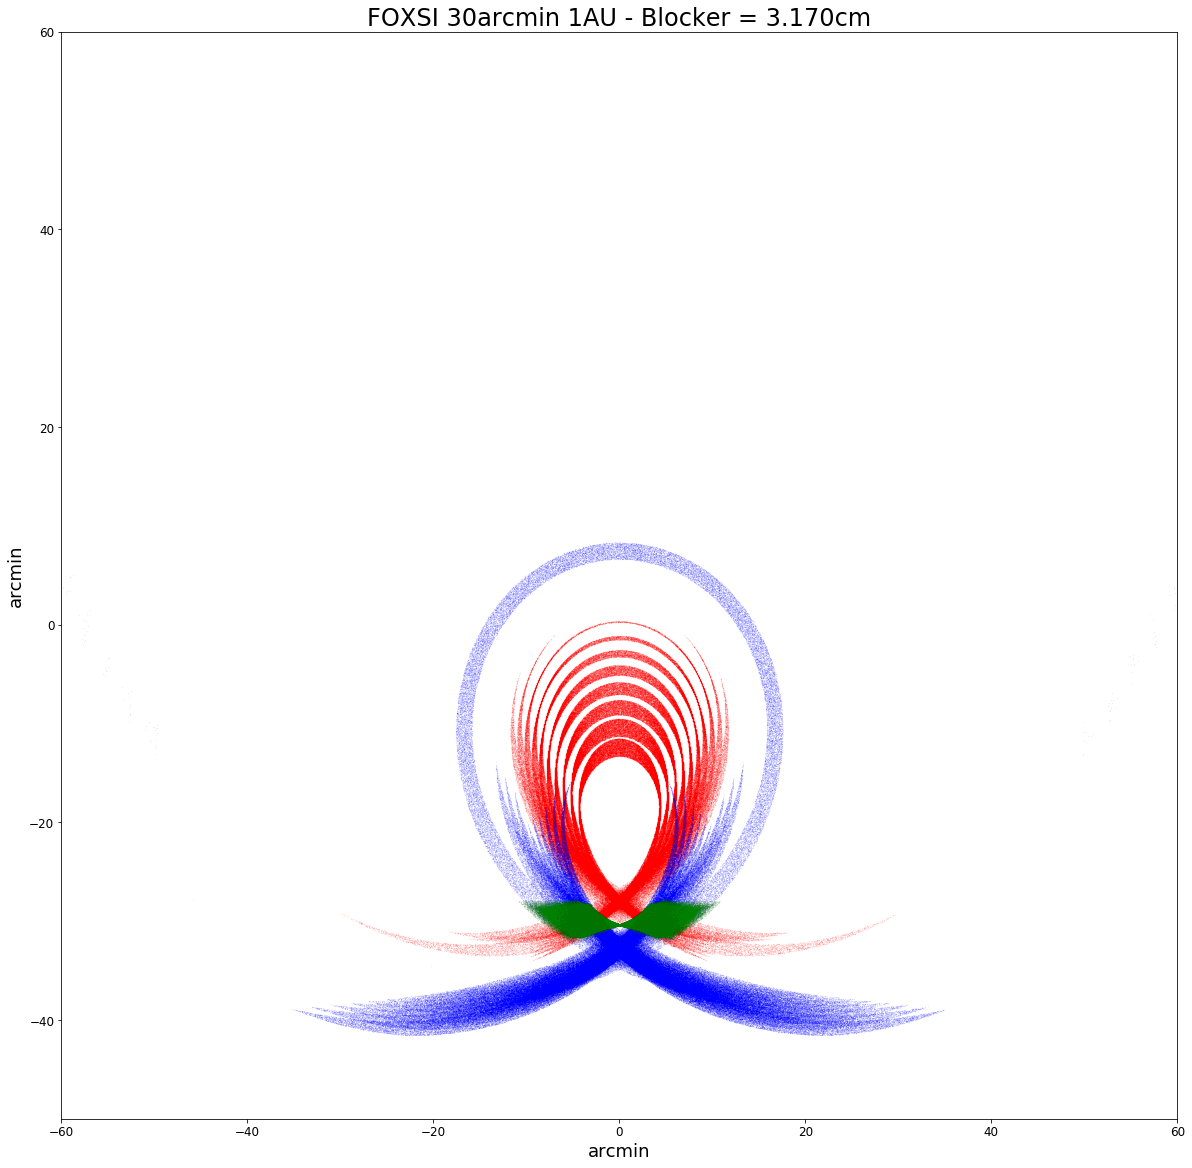

In [20]:
fig = plt.figure(figsize=(20,20))
plt.title('FOXSI 30arcmin 1AU - Blocker = 3.170cm',fontsize=24)
plt.xlabel('arcmin',fontsize=18)
plt.ylabel('arcmin',fontsize=18)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.scatter(B3170Hx,B3170Hy,color='red',s=0.001,alpha=0.8)
plt.scatter(B3170Px,B3170Py,color='blue',s=0.001,alpha=0.8)
plt.scatter(B3170Dx,B3170Dy,color='green',s=0.001,alpha=0.8)
plt.ylim(-50.,60.)
plt.xlim(-60.,60.)
plt.show()

## Blocker diameter = 3.230 cm

In [ ]:
B3230rays = load_rays('/Users/Kamilobu/Desktop/Developer/Milo_RayTracing/1millionRays/1AU/inner_blocker_10Shell/B3230/rays_on_module_3M.csv')
print('Number of rays0 : {:d}'.format(len(B3230rays)))

In [ ]:
# Create detector:
from foxsisim.detector import Detector
B3230detector = Detector(width=10,
                    height=10,
                    normal = [0,0,1],
                    center = [0,0,230],
                    reso = [1024,1024])

# Fix little bug in rays:
for ray in B3230rays:
    ray.hist = ray.hist.tolist()

# Detector Catch rays:
B3230detector.catchRays(B3230rays)

In [ ]:
B3230Drays = [ray for ray in B3230rays if (ray.des[2]==230.0 and ray.bounces ==2 )]
B3230Srays = [ray for ray in B3230rays if (ray.des[2]==230.0 and ray.bounces ==1 )]
B3230Hrays = [ray for ray in B3230rays if (ray.des[2]==230.0 and ray.bounces ==1 and ray.tag[-4:] == 'Hy-D' )]
B3230Prays = [ray for ray in B3230rays if (ray.des[2]==230.0 and ray.bounces ==1 and ray.tag[-4:] == 'Pa-D' )]

#sim_scale = 1.0    # 1cm = 17.4 arcmin
sim_scale = 17.4    # 1cm = 17.4 arcmin

#Hyperboloid
B3230Hx, B3230Hy = [], []
for ray in B3230Hrays:
    B3230Hx.append(ray.pos[0]*sim_scale)
    B3230Hy.append(ray.pos[1]*sim_scale)

# Paraboloid
B3230Px, B3230Py = [], []
for ray in B3230Prays:
    B3230Px.append(ray.pos[0]*sim_scale)
    B3230Py.append(ray.pos[1]*sim_scale)

# Double
B3230Dx, B3230Dy = [], []
for ray in B3230Drays:
    B3230Dx.append(ray.pos[0]*sim_scale)
    B3230Dy.append(ray.pos[1]*sim_scale)

In [ ]:
fig = plt.figure(figsize=(20,20))
plt.title('FOXSI 30arcmin 1AU - Blocker = 3.170cm',fontsize=24)
plt.xlabel('arcmin',fontsize=18)
plt.ylabel('arcmin',fontsize=18)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.scatter(B3230Hx,B3230Hy,color='red',s=0.001,alpha=0.8)
plt.scatter(B3230Px,B3230Py,color='blue',s=0.001,alpha=0.8)
plt.scatter(B3230Dx,B3230Dy,color='green',s=0.001,alpha=0.8)
plt.ylim(-50.,60.)
plt.xlim(-60.,60.)
plt.show()

### Fluxes:

In [27]:
print(len(B2623Drays))
print(len(B2805Drays))
print(len(B2988Drays))
print(len(B3170Drays))
#print(len(B3230Drays))

329851
346446
364067
381653


In [28]:
print(len(B2623Prays))
print(len(B2805Prays))
print(len(B2988Prays))
print(len(B3170Prays))

431311
451306
463023
423967


In [29]:
print(len(B2623Hrays))
print(len(B2805Hrays))
print(len(B2988Hrays))
print(len(B3170Hrays))

579813
539820
487100
462369
